In [1]:
import matplotlib.pyplot as plt

from helpr.physics.api import CrackEvolutionAnalysis
from helpr.physics.cycle_evolution import CycleEvolution

from helpr.utilities.unit_conversion import convert_in_to_m, convert_psi_to_mpa

from probabilistic.capabilities.uncertainty_definitions import DeterministicCharacterization

## **Advanced User Options**

### Specify Common User Inputs

In [2]:
# Pipe dimensions
outer_diameter=DeterministicCharacterization(name='outer_diameter', value=convert_in_to_m(36))
wall_thickness=DeterministicCharacterization(name='wall_thickness', value=convert_in_to_m(0.406))
# Gas environment
max_pressure=DeterministicCharacterization(name='max_pressure', value=convert_psi_to_mpa(840))
min_pressure=DeterministicCharacterization(name='min_pressure', value=convert_psi_to_mpa(638))
temperature=DeterministicCharacterization(name='temperature', value=293)
volume_fraction_h2=DeterministicCharacterization(name='volume_fraction_h2', value=1)
# Pipe material properties
yield_strength=DeterministicCharacterization(name='yield_strength', value=convert_psi_to_mpa(52_000))
fracture_resistance=DeterministicCharacterization(name='fracture_resistance', value=55)
# Flaw geometry
flaw_depth=DeterministicCharacterization(name='flaw_depth', value=25)
flaw_length=DeterministicCharacterization(name='flaw_length', value=convert_in_to_m(1.575))


#### Varying Crack Width Growth Assumption

In [3]:
# Fixed model assumptions
stress_intensity_method='api'
surface='inside'

analysis_prop = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method=stress_intensity_method,
                                  surface=surface,
                                  delta_c_rule='proportional')
analysis_prop.perform_study()

analysis_fix = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method=stress_intensity_method,
                                  surface=surface,
                                  delta_c_rule='fixed')
analysis_fix.perform_study()

analysis_ind = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method=stress_intensity_method,
                                  surface=surface,
                                  delta_c_rule='independent')
analysis_ind.perform_study()

/Users/bbschro/Development/helpr/src/helpr/utilities/postprocessing.py:177: UserWarning: Kmax did not reach fracture resistance for at least one crack, setting a_crit/t = 0.8 for such cracks
  wr.warn('Kmax did not reach fracture resistance for at least one crack, ' +
/Users/bbschro/Development/helpr/src/helpr/utilities/postprocessing.py:177: UserWarning: Kmax did not reach fracture resistance for at least one crack, setting a_crit/t = 0.8 for such cracks
  wr.warn('Kmax did not reach fracture resistance for at least one crack, ' +


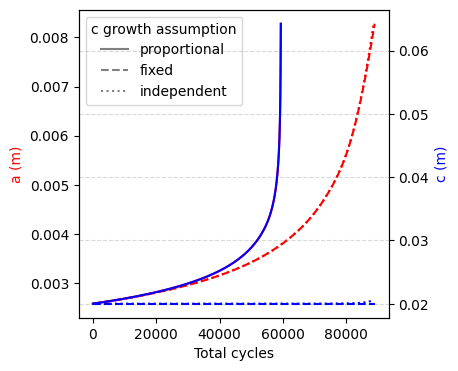

In [4]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()

ax1.plot([], [], color='gray', linestyle='-', label='proportional')
ax1.plot([], [], color='gray', linestyle='--', label='fixed')
ax1.plot([], [], color='gray', linestyle=':', label='independent')

ax1.plot(analysis_prop.nominal_load_cycling['Total cycles'],
         analysis_prop.nominal_load_cycling['a (m)'],
         'r-')
ax2.plot(analysis_prop.nominal_load_cycling['Total cycles'],
         analysis_prop.nominal_load_cycling['c (m)'],
         'b-')
ax1.plot(analysis_fix.nominal_load_cycling['Total cycles'],
         analysis_fix.nominal_load_cycling['a (m)'],
         'r--')
ax2.plot(analysis_fix.nominal_load_cycling['Total cycles'],
         analysis_fix.nominal_load_cycling['c (m)'],
         'b--')
ax1.plot(analysis_ind.nominal_load_cycling['Total cycles'],
         analysis_ind.nominal_load_cycling['a (m)'],
         'r:')
ax2.plot(analysis_ind.nominal_load_cycling['Total cycles'],
         analysis_ind.nominal_load_cycling['c (m)'],
         'b:')

ax1.set_xlabel('Total cycles')
ax1.set_ylabel('a (m)', color='r')
ax2.set_ylabel('c (m)', color='b')

ax1.legend(loc=0, title='c growth assumption')
plt.grid(color='gray', alpha=0.3, linestyle='--')

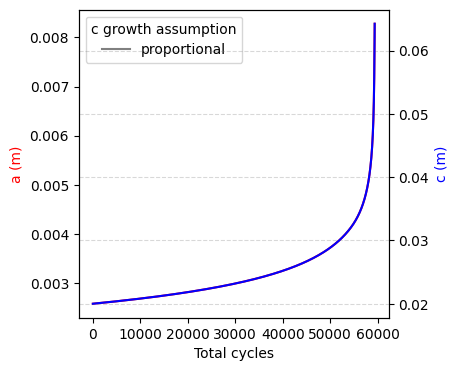

In [5]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
ax1.plot([], [], color='gray', linestyle='-', label='proportional')
ax1.plot(analysis_prop.nominal_load_cycling['Total cycles'],
         analysis_prop.nominal_load_cycling['a (m)'],
         'r-')
ax2.plot(analysis_prop.nominal_load_cycling['Total cycles'],
         analysis_prop.nominal_load_cycling['c (m)'],
         'b-')
ax1.set_xlabel('Total cycles')
ax1.set_ylabel('a (m)', color='r')
ax2.set_ylabel('c (m)', color='b')

ax1.legend(loc=0, title='c growth assumption')
plt.grid(color='gray', alpha=0.3, linestyle='--')

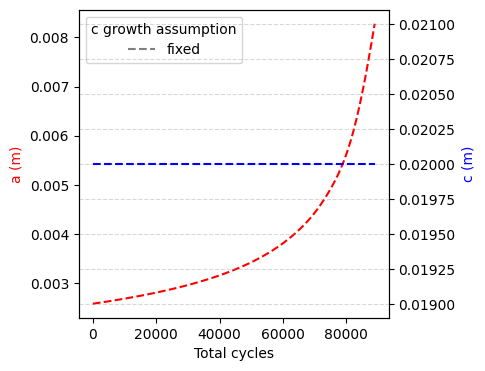

In [6]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
ax1.plot([], [], color='gray', linestyle='--', label='fixed')
ax1.plot(analysis_fix.nominal_load_cycling['Total cycles'],
         analysis_fix.nominal_load_cycling['a (m)'],
         'r--')
ax2.plot(analysis_fix.nominal_load_cycling['Total cycles'],
         analysis_fix.nominal_load_cycling['c (m)'],
         'b--')
ax1.set_xlabel('Total cycles')
ax1.set_ylabel('a (m)', color='r')
ax2.set_ylabel('c (m)', color='b')

ax1.legend(loc=0, title='c growth assumption')
plt.grid(color='gray', alpha=0.3, linestyle='--')

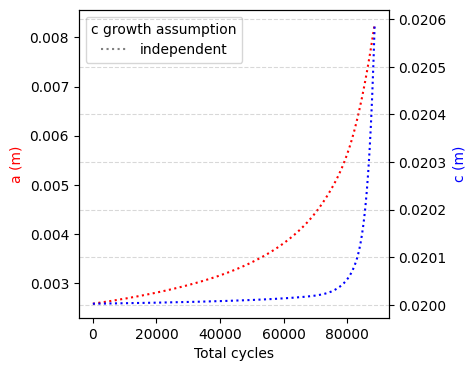

In [7]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
ax1.plot([], [], color='gray', linestyle=':', label='independent')
ax1.plot(analysis_ind.nominal_load_cycling['Total cycles'],
         analysis_ind.nominal_load_cycling['a (m)'],
         'r:')
ax2.plot(analysis_ind.nominal_load_cycling['Total cycles'],
         analysis_ind.nominal_load_cycling['c (m)'],
         'b:')
ax1.set_xlabel('Total cycles')
ax1.set_ylabel('a (m)', color='r')
ax2.set_ylabel('c (m)', color='b')

ax1.legend(loc=0, title='c growth assumption')
plt.grid(color='gray', alpha=0.3, linestyle='--')

### Varying Stress Intensity Factor Method

In [8]:
# Fixed model assumptions
delta_c_rule='proportional'

analysis_and = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method='anderson',
                                  surface='inside',
                                  delta_c_rule=delta_c_rule)
analysis_and.perform_study()

analysis_api_in = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method='api',
                                  surface='inside',
                                  delta_c_rule=delta_c_rule)
analysis_api_in.perform_study()

analysis_api_out = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_depth=flaw_depth,
                                  flaw_length=flaw_length,
                                  stress_intensity_method='api',
                                  surface='outside',
                                  delta_c_rule=delta_c_rule)
analysis_api_out.perform_study()

/Users/bbschro/Development/helpr/src/helpr/physics/stress_state.py:348: UserWarning: Inner Radius / wall thickness exceeds bounds 5 <= R_i/t <= 20, max R_i/t = 43.33497536945812, violating Anderson solution limits.
  wr.warn('Inner Radius / wall thickness exceeds bounds ' +


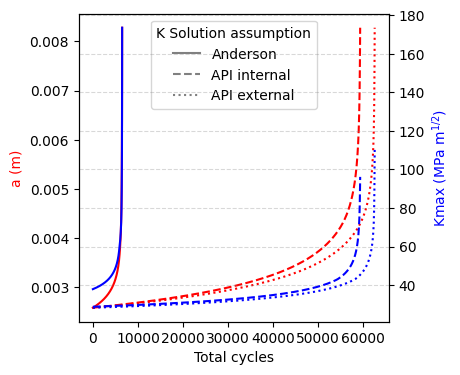

In [9]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()

ax1.plot([], [], color='gray', linestyle='-', label='Anderson')
ax1.plot([], [], color='gray', linestyle='--', label='API internal')
ax1.plot([], [], color='gray', linestyle=':', label='API external')

ax1.plot(analysis_and.nominal_load_cycling['Total cycles'],
         analysis_and.nominal_load_cycling['a (m)'],
         'r-')
ax2.plot(analysis_and.nominal_load_cycling['Total cycles'],
         analysis_and.nominal_load_cycling['Kmax (MPa m^1/2)'],
         'b-')
ax1.plot(analysis_api_in.nominal_load_cycling['Total cycles'],
         analysis_api_in.nominal_load_cycling['a (m)'],
         'r--')
ax2.plot(analysis_api_in.nominal_load_cycling['Total cycles'],
         analysis_api_in.nominal_load_cycling['Kmax (MPa m^1/2)'],
         'b--')
ax1.plot(analysis_api_out.nominal_load_cycling['Total cycles'],
         analysis_api_out.nominal_load_cycling['a (m)'],
         'r:')
ax2.plot(analysis_api_out.nominal_load_cycling['Total cycles'],
         analysis_api_out.nominal_load_cycling['Kmax (MPa m^1/2)'],
         'b:')

ax1.set_xlabel('Total cycles')
ax1.set_ylabel('a (m)', color='r')
ax2.set_ylabel(r'Kmax (MPa m$^{1/2}$)', color='b')

ax1.legend(loc=0, title='K Solution assumption')
plt.grid(color='gray', alpha=0.3, linestyle='--')